# Affective signals - II
----

<span style="color:Blue">**Through this notebook we hope you get an hands on approach to the seminar. 
    Below you will find code snippets and theory that will help you apply the libraries that will be introduced to you in the course.**</span>

----


When I used https://app.gazerecorder.com, it took about 2-3 minutes to calibrate. During the process, a red dot appeared on the screen for me to follow with my eyes. It then asked me to slightly turn my head and follow the dot again to learn my subtle neck movements. Once calibration finished, it opened the Lambdatest : https://www.lambdatest.com/ webpage, where I could see real-time heatmaps for eye gaze.

The eye-tracking function performed quite well. While it lagged slightly behind rapid saccadic movements, it accurately captured fixation points around 90% of the time, as long as my head remained still and I only moved my eyes.

I also tried to test its limits. When I made small head turns (Wollaston effect) while looking at the same spot, it was briefly fooled. However, with exaggerated head movements, the tracking accuracy decreased noticeably. On the positive side, the heatmap didn’t entirely disappear when I tilted my head by 10-20 degrees, so it maintained some functionality. Additionally, when I covered one eye, it alerted me to sit correctly and stopped tracking until I returned to the correct posture.

In [2]:
import numpy as np
import pandas as pd

import subprocess
import time
import os

import matplotlib.pyplot as plt 

import re
import seaborn as sns
sns.set()
import math

from IPython.display import Image


## Eyes
This part of the notebook is focused on the analysis of eye gaze behavior.
Fortunately, the OpenFace-library already includes features regarding the gaze behavior.
Check out the .csv and explore the gaze-related features.

-----

### Eye Gaze
Gaze_angle_x, Gaze_angle_y are features that include eye gaze direction expressed in radians in world coordinates averaged for both eyes. If a person is looking left-right this will results in the change of gaze_angle_x (from positive to negative) and, if a person is looking up-down this will result in change of gaze_angle_y (from negative to positive), if a person is looking straight ahead both of the angles will be close to 0 (within measurement error).

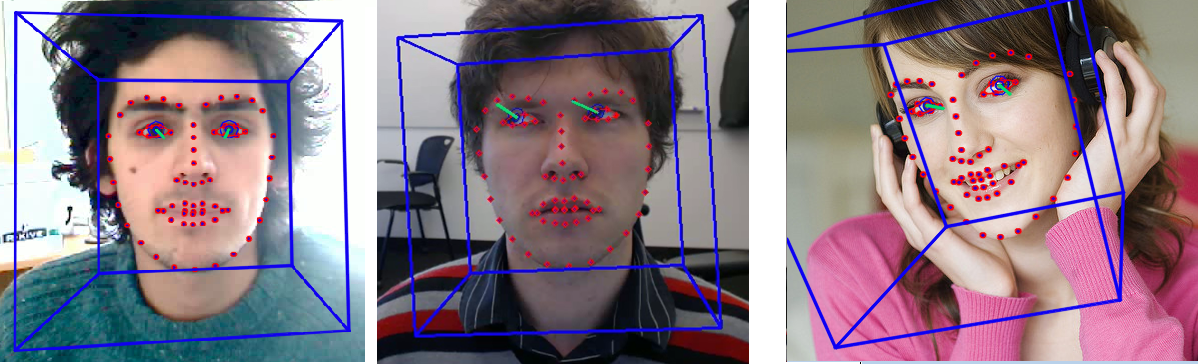 [source](https://github.com/TadasBaltrusaitis/OpenFace/wiki)

In [3]:
#load the csv file using pandas
#change the file path accordingly
df_gaze = pd.read_csv("processed/Self_Intro.csv")

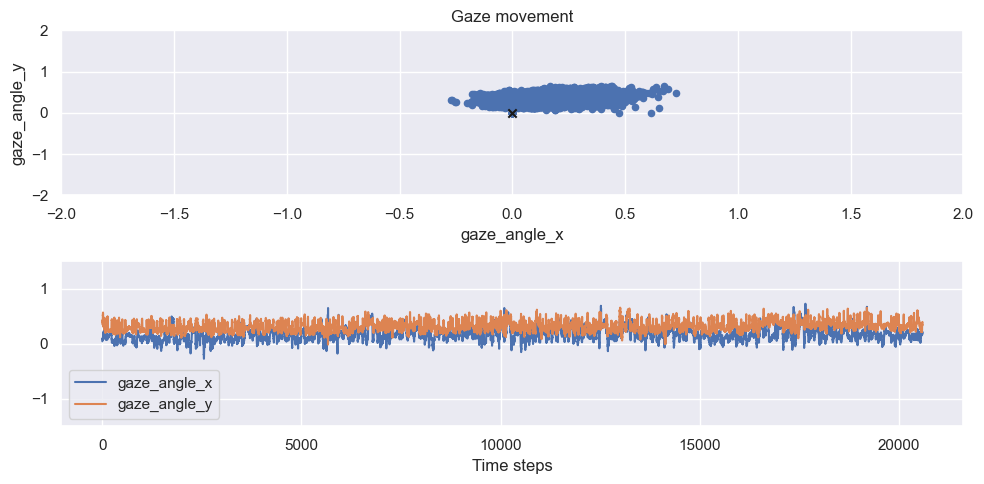

In [4]:
#plot for gaze angles (source https://towardsdatascience.com/how-to-extract-facial-expressions-head-pose-and-gaze-from-any-youtube-video-2aa6590c2bb6)
f,axes = plt.subplots(2,1, figsize=(10,5))
df_gaze.plot.scatter(x='gaze_angle_x', y='gaze_angle_y', ax=axes[0])
axes[0].scatter(0,0, marker='x', color = 'k') # draw origin.
axes[0].set(xlim=[-2,2], ylim=[-2,2], title=f'Gaze movement')
df_gaze[['gaze_angle_x', 'gaze_angle_y']].plot(ax=axes[1])
axes[1].set(ylim=[-1.5,1.5])
axes[1].set_xlabel("Time steps")
plt.tight_layout()
plt.show()

##### Task 2.1: Calculate the mean of the angles of your individual gaze in the video

In [5]:
df_gazeA = df_gaze[['gaze_0_x','gaze_0_y','gaze_0_z','gaze_1_x','gaze_1_x','gaze_1_x']]
df_gazeA.describe()

,gaze_0_x,gaze_0_y,gaze_0_z,gaze_1_x,gaze_1_x,gaze_1_x
count,20591.000000,20591.000000,20591.000000,20591.000000,20591.000000,20591.000000
mean,0.460158,0.251423,-0.831488,-0.167158,-0.167158,-0.167158
std,0.127445,0.091738,0.089405,0.100095,0.100095,0.100095
min,-0.206487,-0.142331,-0.999194,-0.561575,-0.561575,-0.561575
25%,0.369974,0.185070,-0.894859,-0.226963,-0.226963,-0.226963
50%,0.454534,0.253868,-0.843849,-0.170290,-0.170290,-0.170290
75%,0.544663,0.314047,-0.789017,-0.111705,-0.111705,-0.111705
max,0.975367,0.566813,0.000000,0.206552,0.206552,0.206552


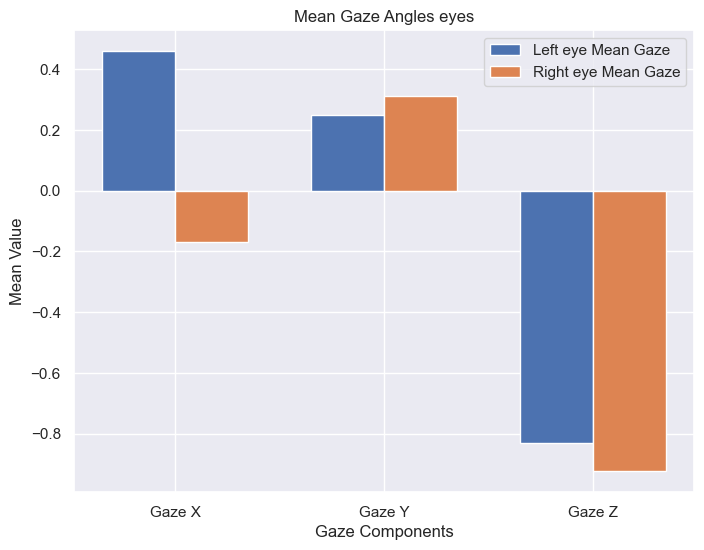

In [6]:
###############################
#     your code goes here     #
###############################

df_gazeA = df_gaze[['gaze_0_x','gaze_0_y','gaze_0_z','gaze_1_x','gaze_1_y','gaze_1_z']]
df_gazeA.describe()

#Bar chart
labels = ['Gaze X', 'Gaze Y', 'Gaze Z']
gaze_l_means = [df_gazeA['gaze_0_x'].mean(),df_gazeA['gaze_0_y'].mean(),df_gazeA['gaze_0_z'].mean()]
gaze_r_means = [df_gazeA['gaze_1_x'].mean(),df_gazeA['gaze_1_y'].mean(),df_gazeA['gaze_1_z'].mean()]

x = np.arange(len(labels))  
width = 0.35  

fig, ax = plt.subplots(figsize=(8, 6))
bar1 = ax.bar(x - width/2, gaze_l_means, width, label='Left eye Mean Gaze')
bar2 = ax.bar(x + width/2, gaze_r_means, width, label='Right eye Mean Gaze')
ax.set_xlabel('Gaze Components')
ax.set_ylabel('Mean Value')
ax.set_title('Mean Gaze Angles eyes')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()

##### Task 2.2: Calculate the variance of the angles of your individual gaze in the video

In [7]:
#df_gaze.columns.tolist()

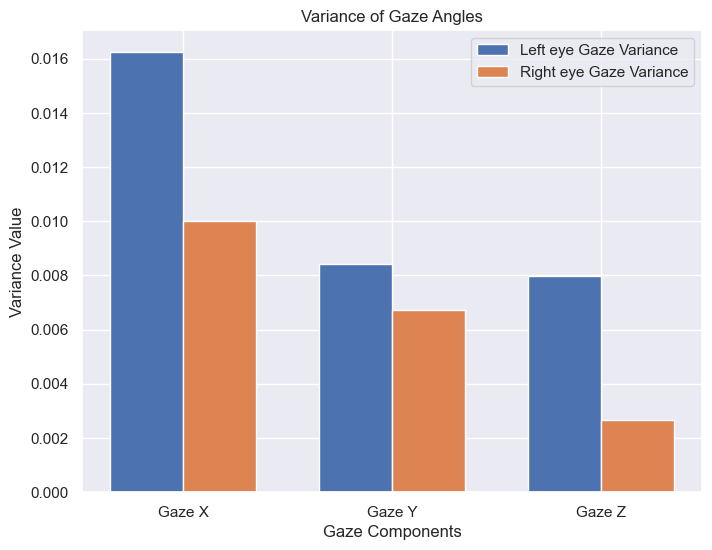

In [8]:
###############################
#     your code goes here     #
###############################

labels = ['Gaze X', 'Gaze Y', 'Gaze Z']
gaze_l_vars = [df_gazeA['gaze_0_x'].var(),df_gazeA['gaze_0_y'].var(),df_gazeA['gaze_0_z'].var()]
gaze_r_vars = [df_gazeA['gaze_1_x'].var(),df_gazeA['gaze_1_y'].var(),df_gazeA['gaze_1_z'].var()]

x = np.arange(len(labels))  
width = 0.35  

fig, ax = plt.subplots(figsize=(8, 6))
bar1 = ax.bar(x - width/2, gaze_l_vars, width, label='Left eye Gaze Variance')
bar2 = ax.bar(x + width/2, gaze_r_vars, width, label='Right eye Gaze Variance')
ax.set_xlabel('Gaze Components')
ax.set_ylabel('Variance Value')
ax.set_title('Variance of Gaze Angles')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()


##### Task 2.3: Calculate the total time you're looking straight ahead.

In [9]:
###############################
#     your code goes here     #
###############################

threshold = 0.13   #Threshold for "looking straight ahead"

#Threshold is satisfied
straight_ahead = df_gaze[(df_gaze['gaze_angle_x'].abs() <= threshold) & (df_gaze['gaze_angle_y'].abs() <= threshold)]

#Total time looking straight ahead by summing the time intervals
total_time = straight_ahead['timestamp'].diff().sum()
print(f"Total time spent looking straight ahead: {total_time} seconds")

Total time spent looking straight ahead: 228.333 seconds


#### Task 2.4 : Find if the gaze is a fixation or a saccade, based on velocity a threshold of 20 deg/s

Heres the original paper that gives the pseudocode for different algoirthms on how to classify a fixation or a saccade https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.68.2459&rep=rep1&type=pdf_gaze

Below you will implement the Velocity-Threshold Identification algorithm.

In [10]:
###############################
#     your code goes here     #
###############################

'''
#get the difference between the angles and the timestamp.This will be used to calculate the velocity
#use this to calculate the velocity(magnitude)(dx/dt, dy/dt)
#as angles are in radians convert it to degree per second
# fixation and saccades are differentiated based on the velocity
# fixation is when velocity is less than 20 deg/s
# saccades is when velocity is greater than 20 deg/s
'''


velocity_threshold = 20  #deg/s

#from radians to degrees
df_gaze['gaze_angle_x_deg'] = np.degrees(df_gaze['gaze_angle_x'])
df_gaze['gaze_angle_y_deg'] = np.degrees(df_gaze['gaze_angle_y'])

df_gaze['time_diff'] = df_gaze['timestamp'].diff()

#Angular velocity
df_gaze['velocity_x'] = df_gaze['gaze_angle_x_deg'].diff() / df_gaze['time_diff']
df_gaze['velocity_y'] = df_gaze['gaze_angle_y_deg'].diff() / df_gaze['time_diff']

#Fixation and saccades are differentiated based on the velocity
#Total gaze velocity as the Euclidean norm of x and y velocities
df_gaze['gaze_velocity'] = np.sqrt(df_gaze['velocity_x']**2 + df_gaze['velocity_y']**2)


#Fixation = Vel < 20 deg/s
#Saccades = Vel > 20 deg/s
df_gaze['movement_type'] = np.where(df_gaze['gaze_velocity'] > velocity_threshold, 'saccade', 'fixation')

df_fixation = df_gaze[['timestamp', 'gaze_angle_x_deg', 'gaze_angle_y_deg', 'gaze_velocity', 'movement_type']]

fixations = []
current_fixation = []

#Iterate over rows to group consecutive fixations
for i, row in df_gaze.iterrows():
    if row['movement_type'] == 'fixation':
        current_fixation.append(row)  #Add to current fixation group
    elif current_fixation:
        #If ending a fixation group, store it and reset
        fixation_df = pd.DataFrame(current_fixation)
        centroid_x = fixation_df['gaze_angle_x_deg'].mean()
        centroid_y = fixation_df['gaze_angle_y_deg'].mean()
        timestamp_start = fixation_df['timestamp'].iloc[0]
        timestamp_end = fixation_df['timestamp'].iloc[-1]
        
        fixations.append({
            'centroid_x': centroid_x,
            'centroid_y': centroid_y,
            'timestamp_start': timestamp_start,
            'timestamp_end': timestamp_end
        })
        current_fixation = []  #Reset fixation group for the next one

#Remaining fixation points at the end
if current_fixation:
    fixation_df = pd.DataFrame(current_fixation)
    centroid_x = fixation_df['gaze_angle_x_deg'].mean()
    centroid_y = fixation_df['gaze_angle_y_deg'].mean()
    timestamp_start = fixation_df['timestamp'].iloc[0]
    timestamp_end = fixation_df['timestamp'].iloc[-1]
    
    fixations.append({
        'centroid_x': centroid_x,
        'centroid_y': centroid_y,
        'timestamp_start': timestamp_start,
        'timestamp_end': timestamp_end
    })
    
fixations_df = pd.DataFrame(fixations)
print(fixations_df)

      centroid_x  centroid_y  timestamp_start  timestamp_end
0       2.463719   22.803720            0.000          0.000
1       5.901465   19.938931            0.133          0.133
2       9.969466   27.559270            0.333          0.333
3      11.000790   20.110819            0.367          0.367
4       9.396508   18.105466            0.400          0.400
...          ...         ...              ...            ...
3389    9.396508   19.595157          342.067        342.067
3390    9.969466   17.704396          342.117        342.117
3391   10.714311   17.131438          342.533        342.533
3392   10.313240   13.636396          342.683        342.683
3393   11.917522   22.517241          343.167        343.167

[3394 rows x 4 columns]


In [11]:
df_fixation

,timestamp,gaze_angle_x_deg,gaze_angle_y_deg,gaze_velocity,movement_type
0,0.000,2.463719,22.803720,NaN,fixation
1,0.017,4.870141,24.522594,173.956564,saccade
2,0.033,4.698254,24.121523,27.271979,saccade
3,0.050,5.213916,23.319382,56.093636,saccade
4,0.067,5.156620,22.517241,47.304976,saccade
...,...,...,...,...,...
20586,343.100,9.682987,18.850311,206.582871,saccade
20587,343.117,10.657015,19.251382,61.962946,saccade
20588,343.133,10.943494,22.402650,197.766428,saccade
20589,343.150,11.917522,22.689129,59.722576,saccade


In [12]:
df_fixation['movement_type'].value_counts()

movement_type
saccade     16391
fixation     4200
Name: count, dtype: int64

### Blinking

Blinking is a activity of closing the eyelids to lubricate the eyes. Blinking frequency depends on various factors such as the time of day and also the task the person is performing. Analysis of blinks helps to uncover patterns within the blinks that can help in detecting deep fakes.[source](https://ieeexplore.ieee.org/document/9072088)


To calculate the number of blinks we will use EAR (Eye-Aspect ratio). EAR takes six points($p_i$) around the eyes and calculates the absolute area of the horizontal axis and vertical axis.

$EAR = \frac{||p_2-p_6||+||p_3-p_5||}{2*||p_1 - p_4||}$

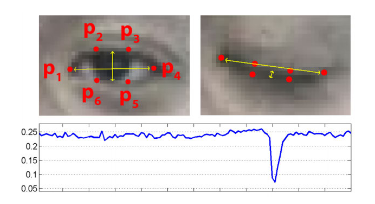
[source](https://ieeexplore.ieee.org/document/9072088)

The above image shows you the landmark that is used to get the Horizontal and vertical axis.



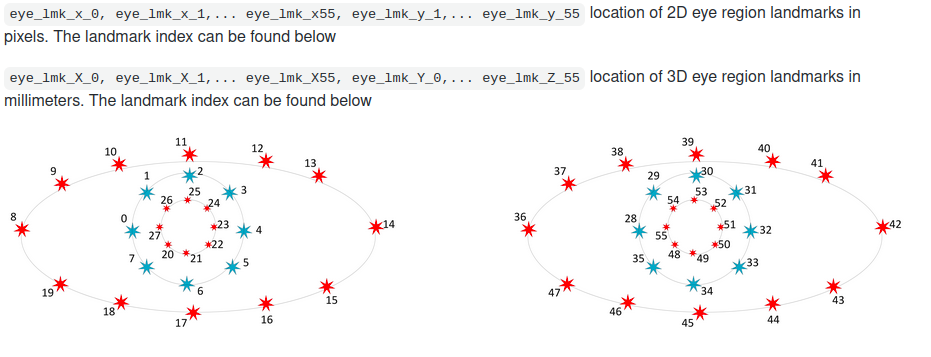 [source](https://github.com/TadasBaltrusaitis/OpenFace/wiki)

Above you can see the co-ordinates that are provided by Openface that  we can use to calculate the EAR.

##### Task 2.5: Calculate the EAR .
Hint : Closly look at the formula for EAR above and see what are the points that you need to extract from the dataframe. Also remember that you are each frame has a EAR that can be calculated. 

In [13]:
#calculation of the ear 
def EAR(df_gaze):
    """Define a funciton that calculates the EAR for both eyes"""

    ###############################
    #     your code goes here     #
    ###############################
    
    #hint: remember that you EAR changes with time and 
    # you need to calculate the EAR at every time stamp 
    
    
def calculate_EAR_for_eye(p1, p2, p3, p4, p5, p6):
    #Vertical distances
    vertical_dist1 = np.sqrt((p2[0] - p6[0])**2 + (p2[1] - p6[1])**2)
    vertical_dist2 = np.sqrt((p3[0] - p5[0])**2 + (p3[1] - p5[1])**2)
    
    #Horizontal distance
    horizontal_dist = np.sqrt((p1[0] - p4[0])**2 + (p1[1] - p4[1])**2)
    
    #EAR for the eye
    ear = (vertical_dist1 + vertical_dist2) / (2 * horizontal_dist)
    return ear

def EAR(df_gaze):
    #Left eye landmarks   8  10  12  14  16  18  
    left_eye_p1 = (df_gaze['eye_lmk_x_8'], df_gaze['eye_lmk_y_8'])
    left_eye_p2 = (df_gaze['eye_lmk_x_10'], df_gaze['eye_lmk_y_10'])
    left_eye_p3 = (df_gaze['eye_lmk_x_12'], df_gaze['eye_lmk_y_12'])
    left_eye_p4 = (df_gaze['eye_lmk_x_14'], df_gaze['eye_lmk_y_14'])
    left_eye_p5 = (df_gaze['eye_lmk_x_16'], df_gaze['eye_lmk_y_16'])
    left_eye_p6 = (df_gaze['eye_lmk_x_18'], df_gaze['eye_lmk_y_18'])

    #Right eye landmarks   36  38  40  42  44  46
    right_eye_p1 = (df_gaze['eye_lmk_x_36'], df_gaze['eye_lmk_y_36'])
    right_eye_p2 = (df_gaze['eye_lmk_x_38'], df_gaze['eye_lmk_y_38'])
    right_eye_p3 = (df_gaze['eye_lmk_x_40'], df_gaze['eye_lmk_y_40'])
    right_eye_p4 = (df_gaze['eye_lmk_x_42'], df_gaze['eye_lmk_y_42'])
    right_eye_p5 = (df_gaze['eye_lmk_x_44'], df_gaze['eye_lmk_y_44'])
    right_eye_p6 = (df_gaze['eye_lmk_x_46'], df_gaze['eye_lmk_y_46'])

    #CEAR for both eyes
    ear_left = calculate_EAR_for_eye(left_eye_p1, left_eye_p2, left_eye_p3, left_eye_p4, left_eye_p5, left_eye_p6)
    ear_right = calculate_EAR_for_eye(right_eye_p1, right_eye_p2, right_eye_p3, right_eye_p4, right_eye_p5, right_eye_p6)
    
    return pd.Series({'EAR_left': ear_left, 'EAR_right': ear_right})

df_gaze[['EAR_left', 'EAR_right']] = df_gaze.apply(EAR, axis=1)
df_eye = df_gaze[['EAR_left', 'EAR_right']]

In [14]:
df_gaze.describe()

,frame,face_id,timestamp,confidence,success,gaze_0_x,gaze_0_y,gaze_0_z,gaze_1_x,gaze_1_y,...,AU28_c,AU45_c,gaze_angle_x_deg,gaze_angle_y_deg,time_diff,velocity_x,velocity_y,gaze_velocity,EAR_left,EAR_right
count,20591.000000,20591.0,20591.000000,20591.00000,20591.00000,20591.000000,20591.000000,20591.000000,20591.000000,20591.000000,...,20591.000000,20591.000000,20591.000000,20591.000000,20590.000000,20590.000000,20590.000000,20590.000000,20591.000000,20591.000000
mean,10296.000000,0.0,171.583333,0.97484,0.99898,0.460158,0.251423,-0.831488,-0.167158,0.312983,...,0.013695,0.264533,9.558072,17.868556,0.016667,0.031991,0.025198,84.802917,0.187684,0.183592
std,5944.254032,0.0,99.070901,0.03452,0.03192,0.127445,0.091738,0.089405,0.100095,0.081935,...,0.116226,0.441095,6.251116,4.865374,0.000471,85.964363,102.917802,103.875230,0.072683,0.060387
min,1.000000,0.0,0.000000,0.03000,0.00000,-0.206487,-0.142331,-0.999194,-0.561575,-0.108832,...,0.000000,0.000000,-15.699044,-0.916732,0.016000,-1964.908203,-1226.803750,0.000000,0.005276,0.008438
25%,5148.500000,0.0,85.791500,0.98000,1.00000,0.369974,0.185070,-0.894859,-0.226963,0.256460,...,0.000000,0.000000,5.328507,14.266649,0.016000,-25.066904,-30.333060,23.831902,0.147721,0.145149
50%,10296.000000,0.0,171.583000,0.98000,1.00000,0.454534,0.253868,-0.843849,-0.170290,0.303101,...,0.000000,0.000000,8.995437,17.475213,0.017000,0.000000,0.000000,49.877366,0.207744,0.189460
75%,15443.500000,0.0,257.375000,0.98000,1.00000,0.544663,0.314047,-0.789017,-0.111705,0.359251,...,0.000000,1.000000,13.120734,20.626481,0.017000,26.962720,26.962720,104.968642,0.241420,0.232913
max,20591.000000,0.0,343.167000,0.98000,1.00000,0.975367,0.566813,0.000000,0.206552,0.799618,...,1.000000,1.000000,41.654032,37.471440,0.017000,2072.759082,1166.137630,2378.278198,0.613845,0.373376


In [15]:
#here the eyes were closed
df_try = df_gaze[df_gaze['timestamp'] == 2.200]
print(df_try)

     frame  face_id  timestamp  confidence  success  gaze_0_x  gaze_0_y  \
132    133        0        2.2        0.98        1  0.418546  0.448316   

     gaze_0_z  gaze_1_x  gaze_1_y  ...  AU45_c  gaze_angle_x_deg  \
132  -0.78983 -0.191774  0.450537  ...     1.0          7.792226   

     gaze_angle_y_deg  time_diff  velocity_x  velocity_y  gaze_velocity  \
132         28.418707      0.017    47.18476   94.369519      105.50833   

     movement_type  EAR_left  EAR_right  
132        saccade  0.036755   0.053283  

[1 rows x 723 columns]


In [16]:
ear_l ,ear_r = EAR(df_gaze)

##### Task 2.6: Plot the calculated EAR values per frame, the mean of EAR values as a horizontal line and mean - 2 * Standard deviation line(threshold line). 

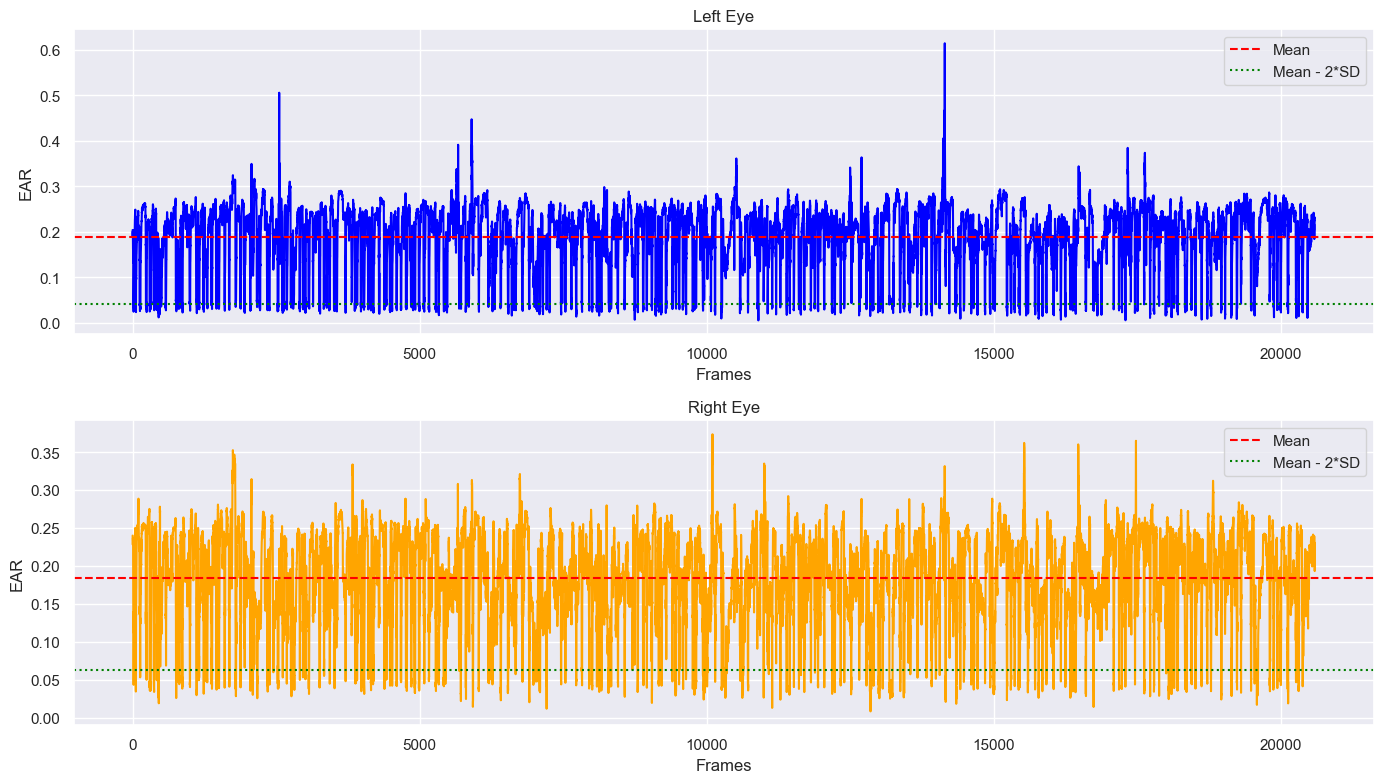

In [17]:
###############################
#     your code goes here     #
###############################

# You should have two ear values per frame. ( left eye EAR and right eye EAR)
# Plot the ear values with x-axis as frames from the csv


MEAR_l = ear_l.mean()           #Mean EAR gfor left eye
SEAR_l = ear_l.std()            #Mean EAR gfor left eye
TEAR_l = MEAR_l - 2 * SEAR_l    #Threshold EAR for left eye

MEAR_r = ear_r.mean()           #Mean EAR gfor left eye
SEAR_r = ear_r.std()            #Mean EAR gfor left eye
TEAR_r = MEAR_r - 2 * SEAR_r    #Threshold EAR for left eye

plt.figure(figsize=(14, 8))
#Left Eye
plt.subplot(2, 1, 1)
plt.plot(df_gaze['frame'], ear_l, color='blue')
plt.axhline(y=MEAR_l, color='red', linestyle='--', label='Mean')
plt.axhline(y=TEAR_l, color='green', linestyle=':', label='Mean - 2*SD')
plt.xlabel("Frames")
plt.ylabel("EAR")
plt.title("Left Eye")
plt.legend()

#Right Eye 
plt.subplot(2, 1, 2)
plt.plot(df_gaze['frame'], ear_r, color='orange')
plt.axhline(y=MEAR_r, color='red', linestyle='--', label='Mean')
plt.axhline(y=TEAR_r, color='green', linestyle=':', label='Mean - 2*SD')
plt.xlabel("Frames")
plt.ylabel("EAR")
plt.title("Right Eye")
plt.legend()


plt.tight_layout()
plt.show()

##### Task 2.7: Try to check the number of times you blink from the graph (you can do this by counting how many times the ear values exceeds the threshold line) 

In [18]:
def count_blinks(ear_values, threshold):
    below_threshold = (ear_values < threshold).fillna(False)  # Check if EAR values are below the threshold  # Ensures no NaN values
    blinks = (below_threshold & ~below_threshold.shift(1).fillna(False)).sum()  # Count transitions from above to below threshold, indicating a blink
    return blinks

LE_blinks = count_blinks(ear_l, TEAR_l)
RE_blinks = count_blinks(ear_r, TEAR_r)

print(f"Number of blinks detected for left eye: {LE_blinks}")
print(f"Number of blinks detected for right eye: {RE_blinks}")

Number of blinks detected for left eye: 346
Number of blinks detected for right eye: 305


##### Your observations: 
The result above are preety unsual, eventhough I was a bit nervous and stressed I did not blink ~280 times. Looking at the video I can say that I  blinked atmost 130-150 times. 

This can be because of the threshold we set here. The threshold (mean−2×std) is standard, it might still capture minor EAR dips that aren’t true blinks. If my natural eye movements (small, involuntary droops or slight closure during speech) drop below this threshold, they’ll be counted as blinks even though they’re not full blinks.

---
There is another way to check the number of times you blink.
In the affectiveSignalsFace Notebook you worked with Action Units. We know that AU45 corresponds to eye blinks. 

Let's try to find out how many times do you blink in your own video based on the presence of the according AU. Use the .csv provided by the OpenFace-Library!

![AU45-blink.gif](AU45-blink.gif)


##### Task 2.8: Count the number of times the action unit AU45 occurs in your video



In [19]:
###############################
#     your code goes here     #
###############################


#AU45_c is 1 and is the start of a new sequence of 1s
au45 = (df_gaze['AU45_c'] == 1) & (df_gaze['AU45_c'].shift(1) == 0)

#Number of continuous AU45 sequences (blinks)
n_45 = au45.sum()

print("There are", n_45, "blinks detected based on AU45 transitions.")

There are 283 blinks detected based on AU45 transitions.


##### Your observations:

Here also it detects more than actual blinks as open face generates a lots of false positives for AU45 (https://github.com/TadasBaltrusaitis/OpenFace/issues/51)

##### Task 2.9: Try to compare the number of blinks that you calculated using the AU_45 to the one you checked from the graph.

##### Your observations:

Comparing with the graph it somewhat varifies the information found there, but I personally think both are not inccurate or my code is ;)

### Pupil Size
The pupil is a black hole located in the center of the iris of the eye that allows light to strike the retina. The amount of light is controlled by the the iris by regulating the pupil size. Pupil size has various links to congitive processes.

Similar to EAR we can use the co-ordinates that are provided by Openface to calculate the pupil size.


##### Task 2.10: Write a funciton to calculate the area of a circle .

In [20]:

def Area_pupils(x1, y1, x2, y2):
    """
    Returns the area of a  circle
    """
    ###############################
    #     your code goes here     #
    ###############################
    
    d = math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)    #diameter using the Euclidean distance between the two points
    r = d / 2                                         #radius
    area = math.pi * r ** 2                           #area of the circle
    return area
    


In [21]:
# Look at the eye landmark diagram again and find the two points that can be used to fine the area of the pupil
# pass those two values to the function you wrote above.

###############################
#     your code goes here     #
###############################

#Using 3d location landmarks 25, 21 for left eye and similarly for right eye we use 53, 49 as they are opposite to each other and get the radius
df_gaze['Area_L'] = df_gaze.apply(lambda row: Area_pupils(row['eye_lmk_X_25'], row['eye_lmk_Y_25'], row['eye_lmk_X_21'], row['eye_lmk_Y_21']), axis=1)
df_gaze['Area_R'] = df_gaze.apply(lambda row: Area_pupils(row['eye_lmk_X_53'], row['eye_lmk_Y_53'], row['eye_lmk_X_49'], row['eye_lmk_Y_49']), axis=1)
print(df_gaze[['Area_L', 'Area_R']].head())

      Area_L     Area_R
0  18.676768  21.739821
1  23.852542  22.187498
2  23.852542  22.187498
3  20.624556  23.192808
4  20.624556  23.012166



##### Task 2.11: Plot how the pupil area varies with time(frames).

In [22]:
df_gaze.describe()

,frame,face_id,timestamp,confidence,success,gaze_0_x,gaze_0_y,gaze_0_z,gaze_1_x,gaze_1_y,...,gaze_angle_x_deg,gaze_angle_y_deg,time_diff,velocity_x,velocity_y,gaze_velocity,EAR_left,EAR_right,Area_L,Area_R
count,20591.000000,20591.0,20591.000000,20591.00000,20591.00000,20591.000000,20591.000000,20591.000000,20591.000000,20591.000000,...,20591.000000,20591.000000,20590.000000,20590.000000,20590.000000,20590.000000,20591.000000,20591.000000,20591.000000,20591.000000
mean,10296.000000,0.0,171.583333,0.97484,0.99898,0.460158,0.251423,-0.831488,-0.167158,0.312983,...,9.558072,17.868556,0.016667,0.031991,0.025198,84.802917,0.187684,0.183592,22.268812,23.277295
std,5944.254032,0.0,99.070901,0.03452,0.03192,0.127445,0.091738,0.089405,0.100095,0.081935,...,6.251116,4.865374,0.000471,85.964363,102.917802,103.875230,0.072683,0.060387,5.510628,5.457702
min,1.000000,0.0,0.000000,0.03000,0.00000,-0.206487,-0.142331,-0.999194,-0.561575,-0.108832,...,-15.699044,-0.916732,0.016000,-1964.908203,-1226.803750,0.000000,0.005276,0.008438,5.733407,4.751659
25%,5148.500000,0.0,85.791500,0.98000,1.00000,0.369974,0.185070,-0.894859,-0.226963,0.256460,...,5.328507,14.266649,0.016000,-25.066904,-30.333060,23.831902,0.147721,0.145149,18.888826,19.807742
50%,10296.000000,0.0,171.583000,0.98000,1.00000,0.454534,0.253868,-0.843849,-0.170290,0.303101,...,8.995437,17.475213,0.017000,0.000000,0.000000,49.877366,0.207744,0.189460,22.258184,22.698007
75%,15443.500000,0.0,257.375000,0.98000,1.00000,0.544663,0.314047,-0.789017,-0.111705,0.359251,...,13.120734,20.626481,0.017000,26.962720,26.962720,104.968642,0.241420,0.232913,25.517586,26.397232
max,20591.000000,0.0,343.167000,0.98000,1.00000,0.975367,0.566813,0.000000,0.206552,0.799618,...,41.654032,37.471440,0.017000,2072.759082,1166.137630,2378.278198,0.613845,0.373376,52.032628,52.166146


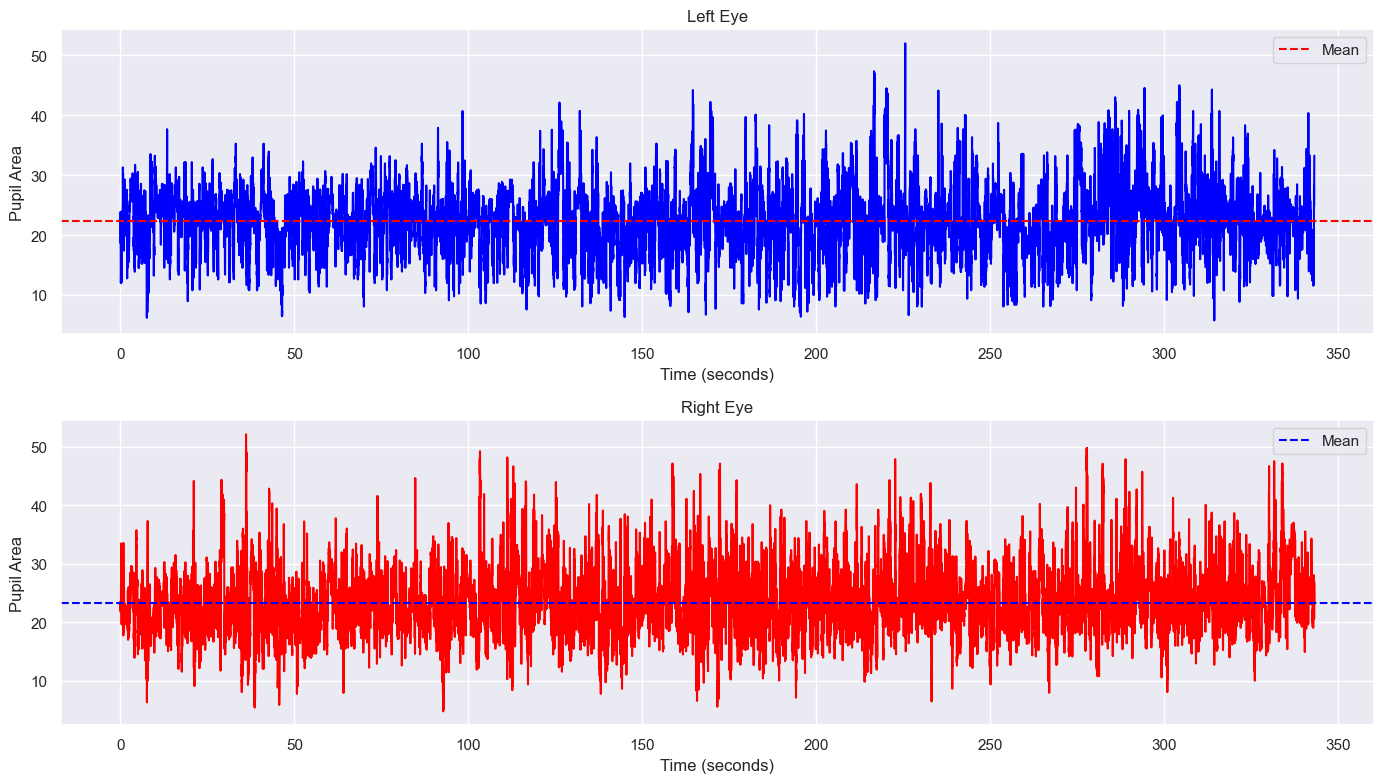

In [23]:
###############################
#     your code goes here     #
###############################


l_mean= round(df_gaze['Area_L'].mean(),2)
r_mean= round(df_gaze['Area_R'].mean(),2)


plt.figure(figsize=(14, 8))

#Left Eye
plt.subplot(2, 1, 1)  # Set the figure size for better visibility
plt.plot(df_gaze['timestamp'], df_gaze['Area_L'], color='blue')
plt.axhline(y=l_mean, color='red', linestyle='--', label='Mean')
plt.title('Pupil Area Variation Over Time')  
plt.xlabel('Time (seconds)') 
plt.ylabel('Pupil Area')
plt.title("Left Eye")
plt.legend()  

#Right Eye 
plt.subplot(2, 1, 2)
plt.plot(df_gaze['timestamp'], df_gaze['Area_R'], color='red')
plt.axhline(y=r_mean, color='blue', linestyle='--', label='Mean')
plt.xlabel('Time (seconds)')  
plt.ylabel('Pupil Area')
plt.title("Right Eye")
plt.legend()
plt.tight_layout()
plt.show()

##### Task 2.12: Calculate the mean of Pupil size.

In [24]:
###############################
#     your code goes here     #
###############################

print("The mean Left eye pupil size is", l_mean, "mm\u00b2")
print("The mean Right eye pupil size is", r_mean, "mm\u00b2")

The mean Left eye pupil size is 22.27 mm²
The mean Right eye pupil size is 23.28 mm²


##### Task 2.13: Calculate the min and maximum of the pupil size.

In [25]:
###############################
#     your code goes here     #
###############################

l_min = round(df_gaze['Area_L'].min(), 2)
l_max = round(df_gaze['Area_L'].max(), 2)
r_min = round(df_gaze['Area_R'].min(), 2)
r_max = round(df_gaze['Area_R'].max(), 2)

print("The Minumun and Maximum pupil size for Left eye is", l_min ,"and", l_max, "mm\u00b2 respectively.")
print("The Minumun and Maximum pupil size for Right eye is", r_min ,"and", r_max, "mm\u00b2 respectively.")

The Minumun and Maximum pupil size for Left eye is 5.73 and 52.03 mm² respectively.
The Minumun and Maximum pupil size for Right eye is 4.75 and 52.17 mm² respectively.


##### Task 2.14: Split your dataframe into three parts based on the time-elapsed( 30 second video into 3 (10second ) parts) , check how the average pupil size changes over the different parts. 

In [26]:
###############################
#     your code goes here     #
###############################

interval_length = 343 / 3
intervals = [i * interval_length for i in range(4)]  #four bounds, three intervals
average = []

for i in range(len(intervals) - 1):
    mask = (df_gaze['timestamp'] >= intervals[i]) & (df_gaze['timestamp'] < intervals[i+1])
    segment = df_gaze.loc[mask]

    #Average pupil areas for the segment
    avg_area_left = segment['Area_L'].mean()
    avg_area_right = segment['Area_R'].mean()
    segment_df = pd.DataFrame({
        'Interval': [f'{intervals[i]:.2f}s - {intervals[i+1]:.2f}s'],
        'Average Area Left': [avg_area_left],
        'Average Area Right': [avg_area_right]
    })
    average.append(segment_df)

Avg_overTime = pd.concat(average, ignore_index=True)
print(Avg_overTime)

            Interval  Average Area Left  Average Area Right
0    0.00s - 114.33s          22.245592           22.633099
1  114.33s - 228.67s          21.933172           23.239408
2  228.67s - 343.00s          22.623663           23.957902


In [27]:
'''
fig, ax = plt.subplots(figsize=(10, 6)) 

#Left eye
ax.bar(averages['Interval'], averages['Average Area Left'], width=0.4, label='Left Eye', align='center')

#Right eye
ax.bar(averages['Interval'], averages['Average Area Right'], width=0.4, label='Right Eye', align='edge')

ax.set_xlabel('Time Interval (s)') 
ax.set_ylabel('Average Pupil Area')  
ax.set_title('Average Pupil Area over Different Time Intervals')  
ax.legend()  

plt.xticks(rotation=45)  
plt.grid(True, which='both', linestyle='--', linewidth=0.5)  
plt.tight_layout()  
plt.show() 
'''

"\nfig, ax = plt.subplots(figsize=(10, 6)) \n\n#Left eye\nax.bar(averages['Interval'], averages['Average Area Left'], width=0.4, label='Left Eye', align='center')\n\n#Right eye\nax.bar(averages['Interval'], averages['Average Area Right'], width=0.4, label='Right Eye', align='edge')\n\nax.set_xlabel('Time Interval (s)') \nax.set_ylabel('Average Pupil Area')  \nax.set_title('Average Pupil Area over Different Time Intervals')  \nax.legend()  \n\nplt.xticks(rotation=45)  \nplt.grid(True, which='both', linestyle='--', linewidth=0.5)  \nplt.tight_layout()  \nplt.show() \n"